<font size=5> **MTH9831 Homework9 Numerical Projects** </font>

<font size=3> **Team members:** </font>
- Chu, Gujia
- Twahir, Omar
- Wu, Chengxun
- Zhu, Bin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
def generate_bm(T, dt):
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m)
    randomness[0] = 0
    return randomness.cumsum()

# Temperature of a rod

## Function approximation $t=0.25$

Core idea: $$f(t,x) = \mathbb{E}[g(B_t) | B_0 = x]$$

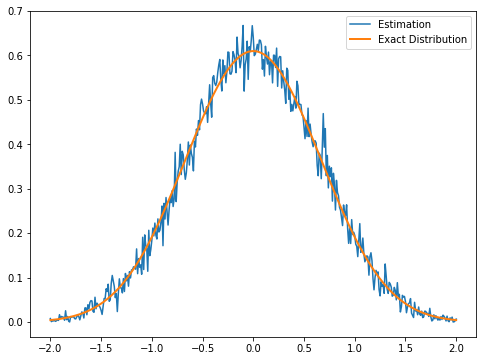

In [3]:
t = 0.25


def g(x):
    return 1 - abs(x) if abs(x) <= 1 else 0


def f(t, x):
    return integrate.quad(
        lambda y: g(y) * np.exp(-(y - x)**2 /
                                (2 * t)) / np.sqrt(2 * np.pi * t), -np.inf,
        np.inf)[0]


estimates = []
for x in np.arange(-2, 2.01, 0.01):
    tmp = np.mean([g(x + generate_bm(0.25, 0.01)[-1]) for _ in range(100)])
    estimates.append(tmp)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(-2, 2.01, 0.01), estimates)
plt.plot(np.arange(-2, 2.01, 0.01),
         [f(t, x) for x in np.arange(-2, 2.01, 0.01)],
         linewidth=2.)
plt.legend(["Estimation", "Exact Distribution"])
plt.show()

## when t = 1

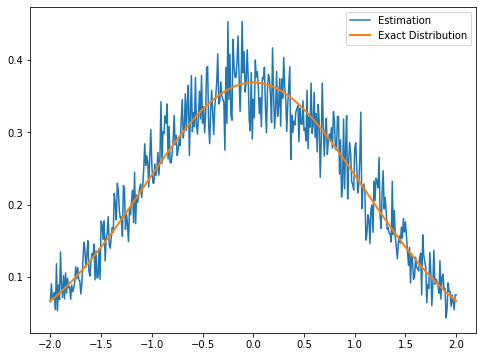

In [4]:
t = 1.

estimates = []
for x in np.arange(-2, 2.01, 0.01):
    tmp = np.mean([g(x + generate_bm(1., 0.01)[-1]) for _ in range(100)])
    estimates.append(tmp)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(-2, 2.01, 0.01), estimates)
plt.plot(np.arange(-2, 2.01, 0.01),
         [f(t, x) for x in np.arange(-2, 2.01, 0.01)],
         linewidth=2.)
plt.legend(["Estimation", "Exact Distribution"])
plt.show()

**Comments:** The approximation is good.

# Smoluchowski's Equation

## a) Sample Smoluchowski paths

In [5]:
def Smoluchowski(T, dt, Z_0):
    randomness = generate_bm(T, dt)
    time_points = np.arange(0, T + dt, dt)
    res = [0 for _ in range(len(randomness))]
    res[0] = Z_0
    for i in range(len(randomness) - 1):
        dB = randomness[i + 1] - randomness[i]
        dT = time_points[i + 1] - time_points[i]
        res[i + 1] = res[i] + dB - 2*np.sign(res[i])*dT
    return res

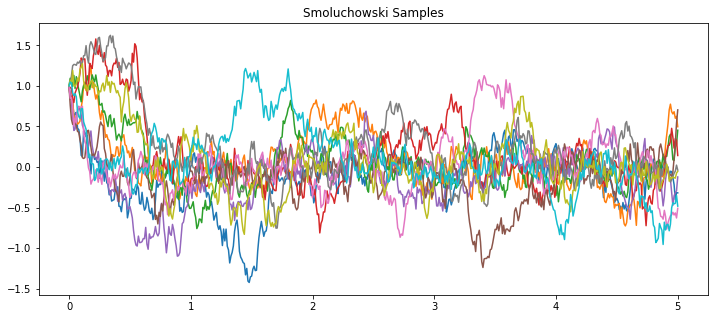

In [6]:
time_points = np.arange(0, 5.01,0.01)
plt.figure(figsize=(12, 5))
for _ in range(10):
    plt.plot(time_points, Smoluchowski(5,0.01,1.))
plt.title("Smoluchowski Samples")
plt.show()

## b) More samples and distribution comparison

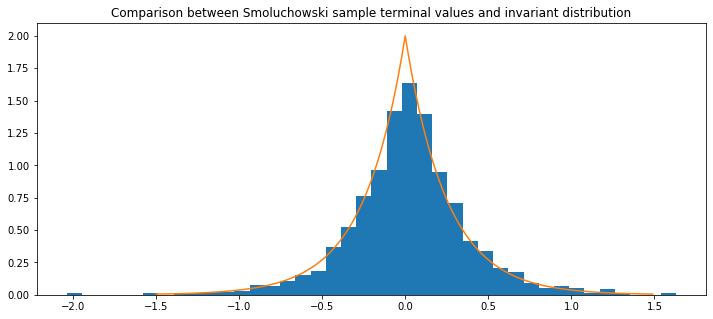

In [7]:
X_samples = [0 for _ in range(1000)]
for i in range(1000):
    X_samples[i] = Smoluchowski(5, 0.01, 1.)[-1]

dist_samples = [2 * np.exp(-4 * abs(x)) for x in np.arange(-1.5, 1.5, 0.01)]
plt.figure(figsize=(12, 5))
plt.hist(X_samples, bins=40, density=True)
plt.plot(np.arange(-1.5, 1.5, 0.01), dist_samples)
plt.title(
    "Comparison between Smoluchowski sample terminal values and invariant distribution")
plt.show()

**Comments:** We see a high-level similarity, that $X_5$ does follow the invariant distribution using the samples generated before.

# Invariant Distribution of the CIR model

$$d X_t = (1-X_t) dt + \sqrt{X_t} d B_t$$

## a) Sample CIR paths

In [8]:
def CIR(T, dt, a, Z_0):
    randomness = generate_bm(T, dt)
    time_points = np.arange(0, T + dt, dt)
    res = [0 for _ in range(len(randomness))]
    res[0] = Z_0
    for i in range(len(randomness) - 1):
        if res[i] <= 0:
            res[i + 1] == 0
            continue
        dB = randomness[i + 1] - randomness[i]
        dT = time_points[i + 1] - time_points[i]
        res[i + 1] = max(0, res[i] + np.sqrt(res[i]) * dB + (a - res[i]) * dT)
    return res

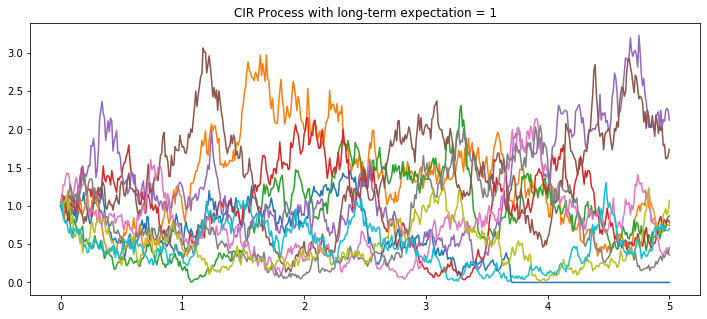

In [9]:
time_points = np.arange(0, 5.01,0.01)
plt.figure(figsize=(12, 5))
for _ in range(10):
    plt.plot(time_points, CIR(5,0.01, 1.,1.))
plt.title("CIR Process with long-term expectation = 1")
plt.show()

## b) More samples and distribution comparison

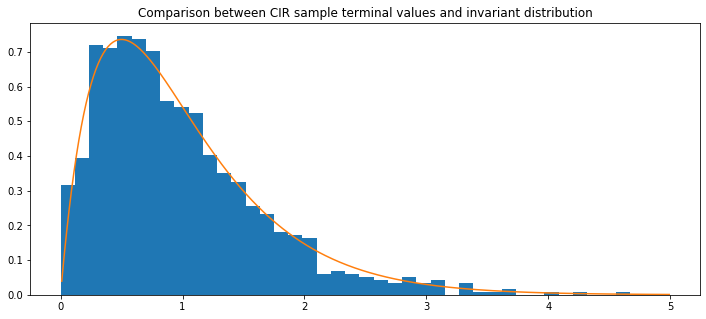

In [10]:
X_samples = [0 for _ in range(1000)]
for i in range(1000):
    X_samples[i] = CIR(5, 0.01, 1., 1.)[-1]

dist_samples = [4 * x * np.exp(-2 * x) for x in np.arange(0.01, 5, 0.01)]
plt.figure(figsize=(12, 5))
plt.hist(X_samples, bins=40, density=True)
plt.plot(np.arange(0.01, 5, 0.01), dist_samples)
plt.title("Comparison between CIR sample terminal values and invariant distribution")
plt.show()

**Comments:** We see a high-level similarity, that $X_5$ does follow the invariant distribution using the samples generated before.